<div style='background-color:#e3f2fd; border-radius:8px; padding:10px; margin-bottom:10px; display:flex; align-items:center;'>
<span style='font-size:2em; margin-right:10px;'>📚</span>
<span style='font-size:1.2em;'><b>N-Gramlar</b></span>
</div>

<div style='background-color:#fffde7; border-radius:8px; padding:10px; margin-bottom:10px; display:flex; align-items:center;'>
<span style='font-size:1.5em; margin-right:10px;'>📝</span>
<span style='font-size:1.1em;'><b>Bu ders notunda, <span style='color:#1976d2;'>N-Gram</span> kavramını sıfırdan ileri seviyeye kadar adım adım öğreneceğiz.</b></span>
</div>
<div style='background-color:#e8f5e9; border-radius:8px; padding:10px; margin-bottom:10px; display:flex; align-items:center;'>
<span style='font-size:1.5em; margin-right:10px;'>💡</span>
<span style='font-size:1.1em;'>Teorik açıklamalar, uygulamalar ve gerçek hayattan örneklerle <b>NLP'de n-gramların gücünü</b> keşfedeceğiz.</span>
</div>
---

<div style='background-color:#fce4ec; border-radius:8px; padding:10px; margin-bottom:10px; display:flex; align-items:center;'>
<span style='font-size:1.5em; margin-right:10px;'>⚙️</span>
<span style='font-size:1.1em;'><b>Gerekli Kütüphanelerin Yüklenmesi ve İçe Aktarılması</b></span>
</div>
NLP uygulamalarında sıkça kullanılan kütüphaneleri yükleyelim ve içe aktaralım. Bunlar arasında <span style='color:#d81b60;'><b>scikit-learn</b></span>, <span style='color:#1976d2;'><b>pandas</b></span> ve <span style='color:#388e3c;'><b>matplotlib</b></span> bulunur.

In [1]:
# Kütüphanelerin yüklenmesi ve içe aktarılması
!pip install scikit-learn pandas matplotlib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

<div style='background-color:#e1f5fe; border-radius:8px; padding:10px; margin-bottom:10px; display:flex; align-items:center;'>
<span style='font-size:1.5em; margin-right:10px;'>🔍</span>
<span style='font-size:1.1em;'><b>N-Gram Kavramının Açıklanması ve Görselleştirilmesi</b></span>
</div>
<span style='color:#1976d2;'><b>N-Gram</b></span>, bir metindeki ardışık <b>n</b> kelimeden oluşan kelime gruplarıdır. NLP'de metni sayısal olarak temsil etmek ve dilin yapısını anlamak için kullanılır.
<br><br>
<br>
<span style='background-color:#ffe0b2;'><b>Kullanım Alanları:</b></span>
- <span style='color:#388e3c;'>Metin sınıflandırma</span>
- <span style='color:#1976d2;'>Otomatik tamamlama</span>
- <span style='color:#d81b60;'>Anahtar kelime çıkarımı</span>
- <span style='color:#fbc02d;'>Dil modelleme</span>
<br>
Aşağıda <b>basit bir n-gram üretimi</b> örneği göreceğiz.

In [2]:
# Basit n-gram üretimi fonksiyonu

def generate_ngrams(text, n):
    words = text.split()
    return [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]

metin = "Doğal dil işleme çalışmasıdır."
print("Unigram:", generate_ngrams(metin, 1))
print("Bigram:", generate_ngrams(metin, 2))
print("Trigram:", generate_ngrams(metin, 3))

Unigram: ['Doğal', 'dil', 'işleme', 'çalışmasıdır.']
Bigram: ['Doğal dil', 'dil işleme', 'işleme çalışmasıdır.']
Trigram: ['Doğal dil işleme', 'dil işleme çalışmasıdır.']


<div style='background-color:#f3e5f5; border-radius:8px; padding:10px; margin-bottom:10px; display:flex; align-items:center;'>
<span style='font-size:1.5em; margin-right:10px;'>🗒️</span>
<span style='font-size:1.1em;'><b>Örnek Metinlerin Hazırlanması</b></span>
</div>
Farklı içeriklere sahip <span style='color:#1976d2;'><b>Türkçe cümlelerden</b></span> oluşan bir liste oluşturalım. Bu metinler üzerinde <b>n-gram analizleri</b> yapacağız.

In [3]:
# Örnek metinler
metinler = [
    "Doğal dil işleme alanı hızla gelişiyor.",
    "N-gram modelleri metin analizi için çok önemlidir.",
    "Makine öğrenmesi ile metinler sınıflandırılabilir.",
    "Spam tespiti için n-gramlar kullanılabilir.",
    "Anahtar kelime çıkarımı metin özetlemede faydalıdır."
]

for i, m in enumerate(metinler, 1):
    print(f"Metin {i}: {m}")

Metin 1: Doğal dil işleme alanı hızla gelişiyor.
Metin 2: N-gram modelleri metin analizi için çok önemlidir.
Metin 3: Makine öğrenmesi ile metinler sınıflandırılabilir.
Metin 4: Spam tespiti için n-gramlar kullanılabilir.
Metin 5: Anahtar kelime çıkarımı metin özetlemede faydalıdır.


<div style='background-color:#e0f7fa; border-radius:8px; padding:10px; margin-bottom:10px; display:flex; align-items:center;'>
<span style='font-size:1.5em; margin-right:10px;'>🔢</span>
<span style='font-size:1.1em;'><b>Unigram, Bigram ve Trigram Modellerinin Oluşturulması</b></span>
</div>
<b>CountVectorizer</b> ile metinleri farklı n-gram aralıklarında vektörleştirelim. <span style='color:#1976d2;'><b>Unigram (1)</b></span>, <span style='color:#388e3c;'><b>Bigram (2)</b></span> ve <span style='color:#d81b60;'><b>Trigram (3)</b></span> örnekleriyle uygulama yapacağız.

In [4]:
# Unigram, Bigram ve Trigram modelleri
vectorizer_uni = CountVectorizer(ngram_range=(1,1))
vectorizer_bi = CountVectorizer(ngram_range=(2,2))
vectorizer_tri = CountVectorizer(ngram_range=(3,3))

X_uni = vectorizer_uni.fit_transform(metinler)
X_bi = vectorizer_bi.fit_transform(metinler)
X_tri = vectorizer_tri.fit_transform(metinler)

print("Unigram Özellikleri:", vectorizer_uni.get_feature_names_out())
print("Bigram Özellikleri:", vectorizer_bi.get_feature_names_out())
print("Trigram Özellikleri:", vectorizer_tri.get_feature_names_out())

Unigram Özellikleri: ['alanı' 'anahtar' 'analizi' 'dil' 'doğal' 'faydalıdır' 'gelişiyor' 'gram'
 'gramlar' 'hızla' 'ile' 'için' 'işleme' 'kelime' 'kullanılabilir'
 'makine' 'metin' 'metinler' 'modelleri' 'spam' 'sınıflandırılabilir'
 'tespiti' 'çok' 'çıkarımı' 'önemlidir' 'özetlemede' 'öğrenmesi']
Bigram Özellikleri: ['alanı hızla' 'anahtar kelime' 'analizi için' 'dil işleme' 'doğal dil'
 'gram modelleri' 'gramlar kullanılabilir' 'hızla gelişiyor'
 'ile metinler' 'için gramlar' 'için çok' 'işleme alanı' 'kelime çıkarımı'
 'makine öğrenmesi' 'metin analizi' 'metin özetlemede'
 'metinler sınıflandırılabilir' 'modelleri metin' 'spam tespiti'
 'tespiti için' 'çok önemlidir' 'çıkarımı metin' 'özetlemede faydalıdır'
 'öğrenmesi ile']
Trigram Özellikleri: ['alanı hızla gelişiyor' 'anahtar kelime çıkarımı' 'analizi için çok'
 'dil işleme alanı' 'doğal dil işleme' 'gram modelleri metin'
 'ile metinler sınıflandırılabilir' 'için gramlar kullanılabilir'
 'için çok önemlidir' 'işleme alanı hızla' 

<div style='background-color:#fff3e0; border-radius:8px; padding:10px; margin-bottom:10px; display:flex; align-items:center;'>
<span style='font-size:1.5em; margin-right:10px;'>📊</span>
<span style='font-size:1.1em;'><b>N-Gram Özelliklerinin İncelenmesi ve Yorumlanması</b></span>
</div>
Oluşan n-gram özelliklerini ve matrislerini inceleyelim. Her bir n-gramın metinlerdeki <span style='color:#388e3c;'><b>frekansını tablo halinde</b></span> gösterelim.

In [5]:
# N-gram matrislerinin tablo olarak gösterimi
uni_df = pd.DataFrame(X_uni.toarray(), columns=vectorizer_uni.get_feature_names_out())
bi_df = pd.DataFrame(X_bi.toarray(), columns=vectorizer_bi.get_feature_names_out())
tri_df = pd.DataFrame(X_tri.toarray(), columns=vectorizer_tri.get_feature_names_out())

print("Unigram Matris Tablosu:")
display(uni_df)
print("Bigram Matris Tablosu:")
display(bi_df)
print("Trigram Matris Tablosu:")
display(tri_df)

Unigram Matris Tablosu:


,alanı,anahtar,analizi,dil,doğal,faydalıdır,gelişiyor,gram,gramlar,hızla,...,metinler,modelleri,spam,sınıflandırılabilir,tespiti,çok,çıkarımı,önemlidir,özetlemede,öğrenmesi
0,1,0,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Bigram Matris Tablosu:


,alanı hızla,anahtar kelime,analizi için,dil işleme,doğal dil,gram modelleri,gramlar kullanılabilir,hızla gelişiyor,ile metinler,için gramlar,...,metin analizi,metin özetlemede,metinler sınıflandırılabilir,modelleri metin,spam tespiti,tespiti için,çok önemlidir,çıkarımı metin,özetlemede faydalıdır,öğrenmesi ile
0,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


Trigram Matris Tablosu:


,alanı hızla gelişiyor,anahtar kelime çıkarımı,analizi için çok,dil işleme alanı,doğal dil işleme,gram modelleri metin,ile metinler sınıflandırılabilir,için gramlar kullanılabilir,için çok önemlidir,işleme alanı hızla,kelime çıkarımı metin,makine öğrenmesi ile,metin analizi için,metin özetlemede faydalıdır,modelleri metin analizi,spam tespiti için,tespiti için gramlar,çıkarımı metin özetlemede,öğrenmesi ile metinler
0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


<div style='background-color:#f1f8e9; border-radius:8px; padding:10px; margin-bottom:10px; display:flex; align-items:center;'>
<span style='font-size:1.5em; margin-right:10px;'>📈</span>
<span style='font-size:1.1em;'><b>N-Gram Frekanslarının Görselleştirilmesi</b></span>
</div>
N-gramların metinlerdeki frekanslarını <span style='color:#1976d2;'><b>bar chart</b></span> ile görselleştirelim. Böylece hangi n-gramların daha sık geçtiğini kolayca görebiliriz.

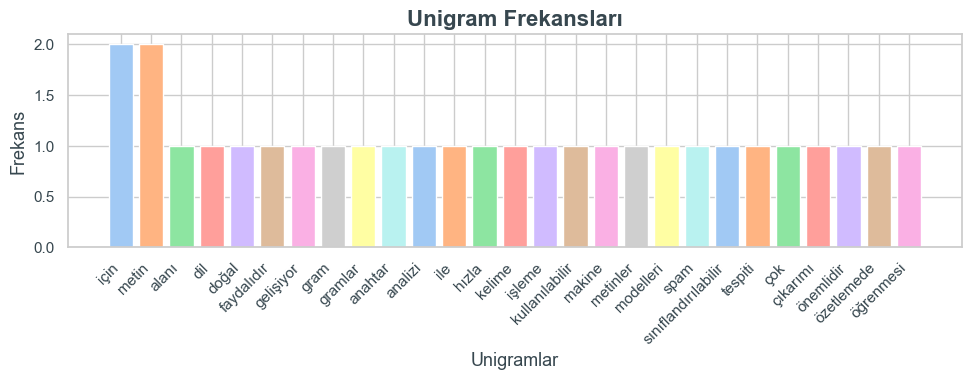

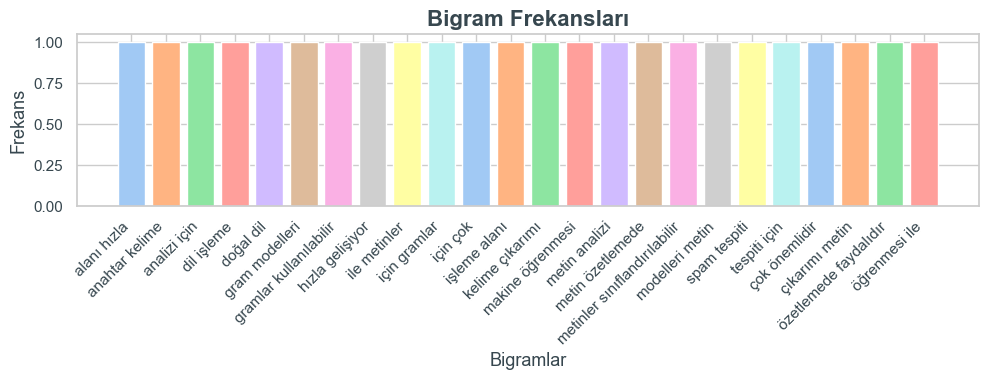

In [9]:
# Unigram frekanslarının görselleştirilmesi (pastel tonlar ve profesyonel stil)
import seaborn as sns
sns.set(style='whitegrid', palette='pastel', font_scale=1.1)

unigram_freq = uni_df.sum().sort_values(ascending=False)
plt.figure(figsize=(10,4))
colors = sns.color_palette('pastel', len(unigram_freq))
bars = plt.bar(unigram_freq.index, unigram_freq.values, color=colors)
plt.title('Unigram Frekansları', fontsize=16, fontweight='bold', color='#37474f')
plt.xlabel('Unigramlar', fontsize=13, color='#37474f')
plt.ylabel('Frekans', fontsize=13, color='#37474f')
plt.xticks(rotation=45, ha='right', fontsize=11, color='#37474f')
plt.yticks(fontsize=11, color='#37474f')
plt.tight_layout()
plt.show()

# Bigram frekanslarının görselleştirilmesi (pastel tonlar ve profesyonel stil)
bigram_freq = bi_df.sum().sort_values(ascending=False)
plt.figure(figsize=(10,4))
colors = sns.color_palette('pastel', len(bigram_freq))
bars = plt.bar(bigram_freq.index, bigram_freq.values, color=colors)
plt.title('Bigram Frekansları', fontsize=16, fontweight='bold', color='#37474f')
plt.xlabel('Bigramlar', fontsize=13, color='#37474f')
plt.ylabel('Frekans', fontsize=13, color='#37474f')
plt.xticks(rotation=45, ha='right', fontsize=11, color='#37474f')
plt.yticks(fontsize=11, color='#37474f')
plt.tight_layout()
plt.show()

<div style='background-color:#ede7f6; border-radius:8px; padding:10px; margin-bottom:10px; display:flex; align-items:center;'>
<span style='font-size:1.5em; margin-right:10px;'>🧪</span>
<span style='font-size:1.1em;'><b>Farklı N-Gram Değerleriyle Deneyler</b></span>
</div>
Farklı n-gram aralıklarıyla (<span style='color:#388e3c;'><b>1-2</b></span>, <span style='color:#d81b60;'><b>2-3</b></span>) vektörleştirme işlemi yapalım ve sonuçları karşılaştıralım.

In [7]:
# 1-2 ve 2-3 aralığında n-gram vektörleştirme
vectorizer_1_2 = CountVectorizer(ngram_range=(1,2))
vectorizer_2_3 = CountVectorizer(ngram_range=(2,3))

X_1_2 = vectorizer_1_2.fit_transform(metinler)
X_2_3 = vectorizer_2_3.fit_transform(metinler)

print("1-2 Gram Özellikleri:", vectorizer_1_2.get_feature_names_out())
print("2-3 Gram Özellikleri:", vectorizer_2_3.get_feature_names_out())

1-2 Gram Özellikleri: ['alanı' 'alanı hızla' 'anahtar' 'anahtar kelime' 'analizi' 'analizi için'
 'dil' 'dil işleme' 'doğal' 'doğal dil' 'faydalıdır' 'gelişiyor' 'gram'
 'gram modelleri' 'gramlar' 'gramlar kullanılabilir' 'hızla'
 'hızla gelişiyor' 'ile' 'ile metinler' 'için' 'için gramlar' 'için çok'
 'işleme' 'işleme alanı' 'kelime' 'kelime çıkarımı' 'kullanılabilir'
 'makine' 'makine öğrenmesi' 'metin' 'metin analizi' 'metin özetlemede'
 'metinler' 'metinler sınıflandırılabilir' 'modelleri' 'modelleri metin'
 'spam' 'spam tespiti' 'sınıflandırılabilir' 'tespiti' 'tespiti için'
 'çok' 'çok önemlidir' 'çıkarımı' 'çıkarımı metin' 'önemlidir'
 'özetlemede' 'özetlemede faydalıdır' 'öğrenmesi' 'öğrenmesi ile']
2-3 Gram Özellikleri: ['alanı hızla' 'alanı hızla gelişiyor' 'anahtar kelime'
 'anahtar kelime çıkarımı' 'analizi için' 'analizi için çok' 'dil işleme'
 'dil işleme alanı' 'doğal dil' 'doğal dil işleme' 'gram modelleri'
 'gram modelleri metin' 'gramlar kullanılabilir' 'hızla gelişiy

<div style='background-color:#fff8e1; border-radius:8px; padding:10px; margin-bottom:10px; display:flex; align-items:center;'>
<span style='font-size:1.5em; margin-right:10px;'>🌟</span>
<span style='font-size:1.1em;'><b>Gerçek Hayattan 5 Farklı N-Gram Uygulama Örneği</b></span>
</div>
Aşağıda n-gramların NLP'de kullanıldığı <span style='color:#1976d2;'><b>5 farklı uygulama örneği</b></span> ve kısa kodları yer almaktadır.

In [8]:
# 1. Spam Tespiti
spam_metinler = ["Ücretsiz kazan!", "Hemen tıkla ve ödül kazan.", "Bu bir spam mesajdır."]
vectorizer_spam = CountVectorizer(ngram_range=(1,2))
X_spam = vectorizer_spam.fit_transform(spam_metinler)
print("Spam tespiti için n-gramlar:", vectorizer_spam.get_feature_names_out())

# 2. Duygu Analizi
duygu_metinler = ["Çok mutluyum", "Bugün üzgün hissediyorum", "Harika bir gün"]
vectorizer_duygu = CountVectorizer(ngram_range=(1,2))
X_duygu = vectorizer_duygu.fit_transform(duygu_metinler)
print("Duygu analizi için n-gramlar:", vectorizer_duygu.get_feature_names_out())

# 3. Otomatik Tamamlama
metin_otomatik = "Doğal dil"
n_grams_otomatik = generate_ngrams(metin_otomatik, 2)
print("Otomatik tamamlama için bigramlar:", n_grams_otomatik)

# 4. Metin Özetleme
uzun_metin = "Doğal dil işleme ile metinler özetlenebilir ve anlamlı bilgiler çıkarılabilir."
n_grams_ozet = generate_ngrams(uzun_metin, 3)
print("Metin özetleme için trigramlar:", n_grams_ozet)

# 5. Anahtar Kelime Çıkarımı
anahtar_metin = "Makine öğrenmesi ve n-gramlar metin analizi için kullanılır."
vectorizer_anahtar = CountVectorizer(ngram_range=(1,1))
X_anahtar = vectorizer_anahtar.fit_transform([anahtar_metin])
print("Anahtar kelimeler:", vectorizer_anahtar.get_feature_names_out())

Spam tespiti için n-gramlar: ['bir' 'bir spam' 'bu' 'bu bir' 'hemen' 'hemen tıkla' 'kazan' 'mesajdır'
 'spam' 'spam mesajdır' 'tıkla' 'tıkla ve' 've' 've ödül' 'ödül'
 'ödül kazan' 'ücretsiz' 'ücretsiz kazan']
Duygu analizi için n-gramlar: ['bir' 'bir gün' 'bugün' 'bugün üzgün' 'gün' 'harika' 'harika bir'
 'hissediyorum' 'mutluyum' 'çok' 'çok mutluyum' 'üzgün'
 'üzgün hissediyorum']
Otomatik tamamlama için bigramlar: ['Doğal dil']
Metin özetleme için trigramlar: ['Doğal dil işleme', 'dil işleme ile', 'işleme ile metinler', 'ile metinler özetlenebilir', 'metinler özetlenebilir ve', 'özetlenebilir ve anlamlı', 've anlamlı bilgiler', 'anlamlı bilgiler çıkarılabilir.']
Anahtar kelimeler: ['analizi' 'gramlar' 'için' 'kullanılır' 'makine' 'metin' 've' 'öğrenmesi']
